In [2]:
import pandas as pd
import numpy as np
import re
import umap
import hdbscan
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
df = pd.read_csv('IT_Job_Roles_Skills.csv', encoding='ISO-8859-1')

In [5]:
def clean_title(title):
    title = str(title).lower()
    title = re.sub(r'[^a-zA-Z ]', '', title)
    return title.strip()

df['Cleaned_Job_Title'] = df['Job Title'].apply(clean_title)

In [6]:
title_mappings = {
    'ios developer': ['ios developer', 'junior ios developer', 'ios dev'],
    'android developer': ['android developer'],
    'data scientist': ['data scientist', 'junior data scientist'],
    'data analyst': ['data analyst'],
    'software engineer': ['software engineer', 'junior software engineer', 'entry level software developer'],
    'frontend developer': ['front end developer', 'junior front end developer', 'front end web developer', 'frontend engineer'],
    'ai architect': ['artificial intelligence architect', 'machine learning architect', 'principle engineer in artificial intelligence', 'principle engineer in machine learning'],
    'uiux designer': ['ux designer', 'uxui designer', 'ui user interface designer', 'ui designer', 'ux researcher'],
    'machine learning engineer': ['machine learning engineer', 'ml engineer', 'junior machine learning engineer'],
    'devops engineer': ['devops engineer', 'senior devops engineer', 'devops architect', 'ansible operations engineer', 'kubernetes operations engineer'],
    'cloud architect': ['cloud architect', 'cloud engineer', 'cloud operations engineer'],
}


In [7]:
title_mappings.update({
    'front end developer': [
        'front end developer',
        'junior front end developer',
        'front end web developer',
        'frontend engineer',
        'frontend developer'
    ],
    'ai architect': [
        'artificial intelligence architect',
        'machine learning architect',
        'principle engineer in artificial intelligence',
        'principle engineer in machine learning'
    ],
    'uiux designer': [
        'ux designer',
        'uxui designer',
        'ui user interface designer',
        'ui designer',
        'ux researcher'
    ],
    'machine learning engineer': [
        'machine learning engineer',
        'ml engineer',
        'junior machine learning engineer'
    ],
    'devops engineer': 'devops engineer',
    'senior devops engineer': 'devops engineer',
    'devops architect': 'devops architect',
    'devsecops architect': 'devsecops architect',  # VALID
    'ansible operations engineer': 'devops engineer',
    'kubernetes operations engineer': 'devops engineer',
    'packer engineer': 'devops engineer',

    'cloud architect': 'cloud architect',
    'cloud security engineer': 'cloud security engineer',

    'chef inspec engineer': 'chief inspec engineer',  # PRESERVED
})


In [8]:
  title_mappings.update({# UX/UI Variants
    'ux designer': 'ux/ui designer',
    'uxui designer': 'ux/ui designer',
    'ux/ui designer': 'ux/ui designer',
    'ui (user interface) designer': 'ux/ui designer',
    'web designer (ui/ux designer)': 'ux/ui designer',

    # Mobile Development
    'mobile app developer': 'mobile application developer',
    'mobile application developer': 'mobile application developer',

    # Extra Cleanups
    'packer engineer': 'devops engineer',
    'ansible operations engineer': 'devops engineer',
    'chef inspec engineer': 'devsecops engineer',  # corrected
    'chief operations engineer': 'devsecops engineer',  # corrected
  })

In [9]:
title_mappings.update({
    # UX/UI Variants
    'ux designer': 'ux/ui designer',
    'uxui designer': 'ux/ui designer',
    'ux/ui designer': 'ux/ui designer',
    'ui (user interface) designer': 'ux/ui designer',
    'web designer (ui/ux designer)': 'ux/ui designer',

    # Mobile Development
    'mobile app developer': 'mobile application developer',
    'mobile application developer': 'mobile application developer',

    # Extra Cleanups
    'packer engineer': 'devops engineer',
    'ansible operations engineer': 'devops engineer',
    'chef inspec engineer': 'devsecops engineer',
    'chief operations engineer': 'devsecops engineer',

    # QA/DevOps Testing
    'jacoco engineer': 'qa/devops testing engineer',
    'junit engineer': 'qa/devops testing engineer',
    'qa engineer': 'qa/devops testing engineer',
    'sonarqube engineer': 'qa/devops testing engineer',

    # Monitoring/Observability
    'splunk engineer': 'observability/monitoring engineer',
    'appdynamics engineer': 'observability/monitoring engineer',
    'datadog engineer': 'observability/monitoring engineer',
    'grafana engineer': 'observability/monitoring engineer',
    'new relic engineer': 'observability/monitoring engineer',

    # Front-End Dev
    'entry level web developer': 'front-end developer',
    'front end developer': 'front-end developer',
    'junior front end developer': 'front-end developer',
    'front end web developer': 'front-end developer',
    'javascript developer': 'front-end developer',

    # IT Support
    'production support engineer': 'it support specialist',
    'help desk technician': 'it support specialist',
    'computer support specialist': 'it support specialist',
    'technology assistant': 'it support specialist',
    'it support specialist': 'it support specialist',

    # Database Roles
    'oracle developer': 'database specialist',
    'oracle sql developer': 'database specialist',
    'database administrator': 'database specialist',
    'sql developer': 'database specialist',
    'database architect': 'database specialist',

    # AI/ML Architects
    'artificial intelligence machine learning leader': 'ai/ml architect',
    'artificial intelligence architect': 'ai/ml architect',
    'machine learning architect': 'ai/ml architect',
    'principle engineer in artificial intelligence': 'ai/ml architect',
    'principle engineer in machine learning': 'ai/ml architect',

    # Cybersecurity
    'information security analyst': 'cybersecurity specialist',
    'cybersecurity analyst': 'cybersecurity specialist',
    'cybersecurity specialist': 'cybersecurity specialist',
    'cybersecurity engineer': 'cybersecurity specialist',
    'infosec analystcybersecurity analyst': 'cybersecurity specialist',

    # Big Data
    'admin big data': 'big data specialist',
    'big data architect': 'big data specialist',
    'big data specialist': 'big data specialist',
    'principle engineer in big data': 'big data specialist',
    'data architect': 'big data specialist',

    # UX Group
    'interaction designer': 'ux/ui designer',
    'information architect': 'ux/ui designer',

    # Programming General
    'coder': 'programmer',
    'computer programmer': 'programmer',
    'developer': 'programmer',
    'entry level programmer': 'programmer',
    'programmer': 'programmer',

    # Entry-Level Engineering
    'entry level developer': 'entry-level software developer',
    'entry level software developer': 'entry-level software developer',
    'entry level software engineer': 'entry-level software developer',
    'full stack python developerprogrammerengineer': 'entry-level software developer',
    'jr developer': 'entry-level software developer',

    # Management Roles
    'devops manager': 'engineering manager',
    'director of engineering': 'engineering manager',
    'it manager': 'engineering manager',
    'chief information officer': 'engineering manager',
    'technology manager': 'engineering manager',

    # Cloud & Infra
    'cloud architect': 'cloud/infra architect',
    'devops architect': 'cloud/infra architect',
    'senior devops engineer': 'cloud/infra architect',
    'infrastructure architect': 'cloud/infra architect',
    'cloud computing specialist': 'cloud/infra architect',

    # Sysadmin & Ops
    'operations engineer': 'systems administrator',
    'network and systems administrator': 'systems administrator',
    'systems administrator': 'systems administrator',
    'systems engineer': 'systems administrator',
    'cloud administrator': 'systems administrator',

    # Build & Release
    'bamboo engineer': 'build and release engineer',
    'build and release engineer': 'build and release engineer',
    'build engineer': 'build and release engineer',
    'jenkins engineer': 'build and release engineer',
    'senior build and release engineer': 'build and release engineer',
    'artifactory administrator': 'build and release engineer'
})

In [10]:
def clean_skills(text):
    if pd.isna(text): return ""
    text = text.lower()

    # Join known multi-word phrases first
    multi_word_skills = {
        'version control': 'version_control',
        'machine learning': 'machine_learning',
        'deep learning': 'deep_learning',
        'natural language processing': 'nlp',
        'data analysis': 'data_analysis',
        'data science': 'data_science',
        'object oriented programming': 'oop',
        'software development life cycle': 'sdlc'
    }

    for phrase, replacement in multi_word_skills.items():
        text = text.replace(phrase, replacement)

    # Continue with your cleaning
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()


df['Cleaned_Skills'] = df['Skills'].apply(clean_skills)


In [11]:
skill_mapping = {
    # Programming Languages
    'python3': 'python',
    'python 3': 'python',
    'python-3': 'python',
    'core java': 'java',
    'java se': 'java',
    'java programming': 'java',
    'js': 'javascript',
    'java script': 'javascript',
    'javascript.js': 'javascript',
    'cpp': 'c++',
    'c plus plus': 'c++',
    'c-sharp': 'c#',
    'c sharp': 'c#',
    '.net c#': 'c#',
    'ruby on rails': 'ruby',
    'ror': 'ruby',
    'php7': 'php',
    'php 7': 'php',
    'php5': 'php',

    # Web Development
    'html5': 'html',
    'html 5': 'html',
    'css3': 'css',
    'css 3': 'css',
    'bootstrap4': 'bootstrap',
    'bootstrap 4': 'bootstrap',
    'node js': 'nodejs',
    'node.js': 'nodejs',
    'node': 'nodejs',
    'react': 'reactjs',
    'react js': 'reactjs',
    'react.js': 'reactjs',
    'angularjs': 'angular',
    'angular.js': 'angular',
    'angular 2+': 'angular',
    'vue': 'vuejs',
    'vue.js': 'vuejs',
    'django rest framework': 'django',
    'drf': 'django',

    # Cloud & DevOps
    'amazon web services': 'aws',
    'aws cloud': 'aws',
    'google cloud': 'gcp',
    'google cloud platform': 'gcp',
    'microsoft azure': 'azure',
    'jenkins ci': 'jenkins',
    'jenkins pipeline': 'jenkins',
    'docker containers': 'docker',
    'k8s': 'kubernetes',
    'ansible automation': 'ansible',
    'terraform cloud': 'terraform',

    # Data & Analytics
    'ms excel': 'excel',
    'microsoft excel': 'excel',
    'powerbi': 'power bi',
    'tableau desktop': 'tableau',
    'mysql': 'sql',
    'postgresql': 'sql',
    'mssql': 'sql',
    'sql server': 'sql',
    'np': 'numpy',
    'pd': 'pandas',
    'scientific python': 'scipy',

    # Machine Learning / AI
    'ml': 'machine learning',
    'dl': 'deep learning',
    'natural language processing': 'nlp',
    'cv': 'computer vision',
    'tf': 'tensorflow',
    'keras api': 'keras',
    'sklearn': 'scikit-learn',
    'data scientist': 'data science',
    'data analyst': 'data analysis',

    # Tools & Platforms
    'github': 'git',
    'gitlab': 'git',
    'atlassian jira': 'jira',
    'ubuntu': 'linux',
    'centos': 'linux',
    'red hat': 'linux',
    'visual studio code': 'vs code',
    '.net,':'.net'


}


In [12]:
def map_skills(skill_text):
    if pd.isna(skill_text):
        return ""
    skills = [s.strip().lower() for s in skill_text.split(',')]
    mapped = [skill_mapping.get(s, s) for s in skills]
    return ', '.join(sorted(set(mapped)))

df['Cleaned_Skills'] = df['Skills'].apply(map_skills)


In [17]:
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_skills = vectorizer.fit_transform(df['Cleaned_Skills'])
#2nd attempt code

In [14]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Cleaned_Skills'])

In [18]:
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine', random_state=42)
X_umap = reducer.fit_transform(X_skills)
#2nd attempt code

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [19]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, metric='euclidean')
cluster_labels = clusterer.fit_predict(X_umap)

df['Skill_Cluster'] = cluster_labels
#2nd attempt code

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


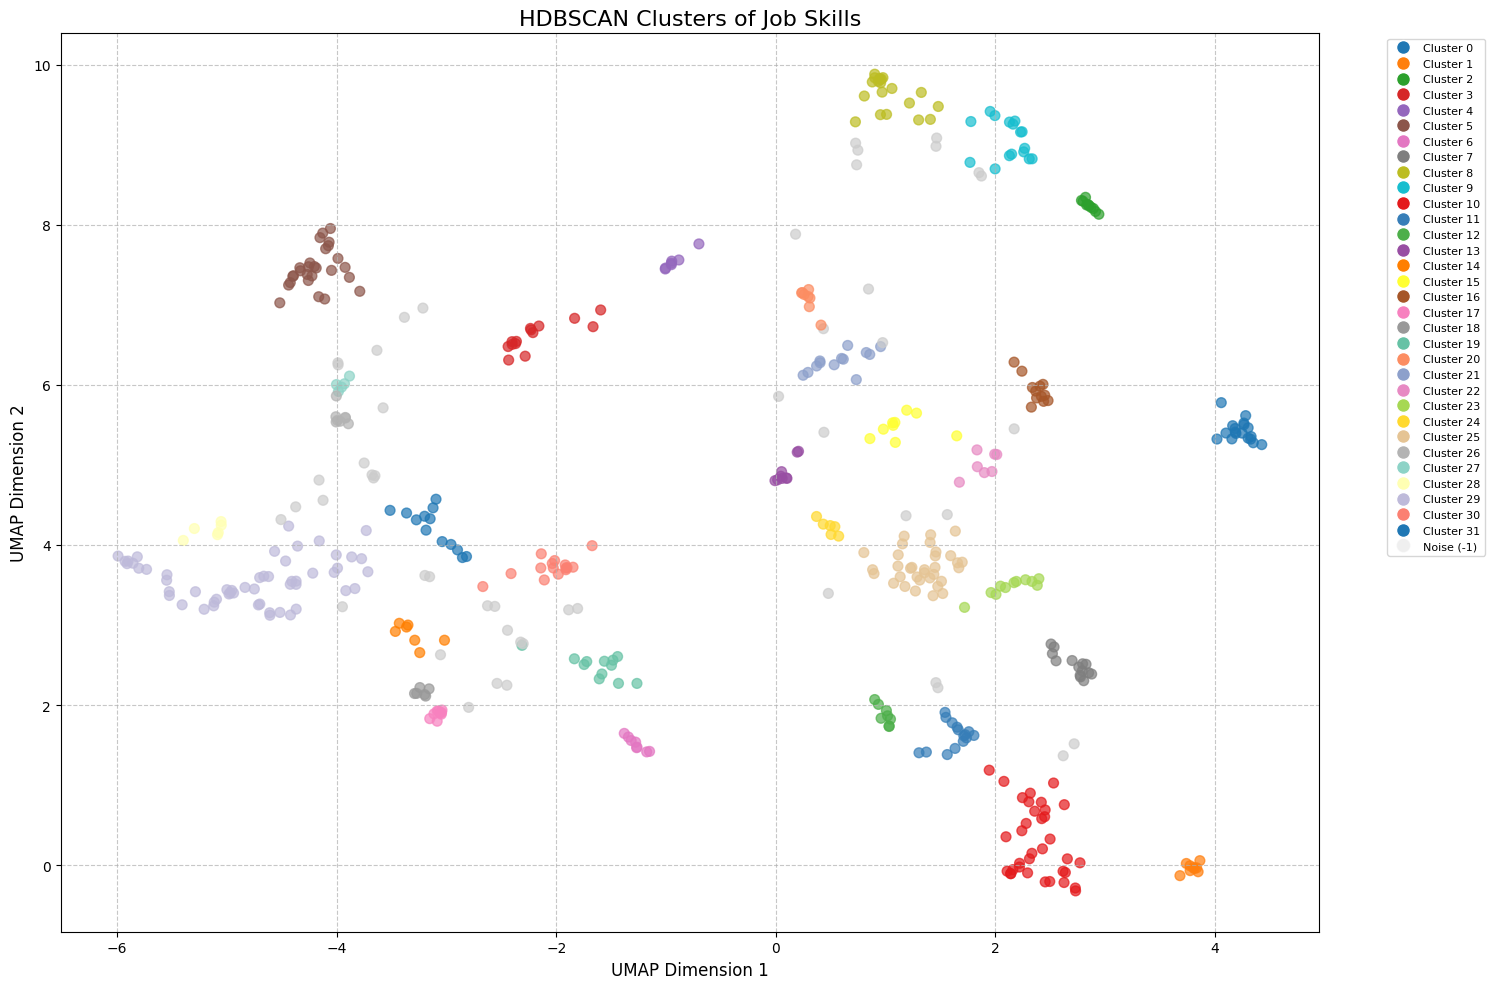

In [20]:
plt.figure(figsize=(15, 10))

# Create a custom color palette with 31 distinct colors
import matplotlib.colors as mcolors
import numpy as np

# Combine multiple color palettes to get enough distinct colors
base_colors = []
base_colors.extend(plt.cm.tab10.colors)  # 10 colors
base_colors.extend(plt.cm.Set1.colors)   # 9 colors
base_colors.extend(plt.cm.Set2.colors)   # 8 colors
base_colors.extend(plt.cm.Set3.colors)   # 12 colors
base_colors.extend(plt.cm.Dark2.colors)  # 8 colors

# Ensure we have at least 31 unique colors
unique_colors = list(dict.fromkeys([tuple(c) for c in base_colors]))[:31]
# Fill with additional random colors if needed
while len(unique_colors) < 31:
    new_color = tuple(np.random.random(3).tolist() + [1.0])  # RGB + alpha
    if new_color not in unique_colors:
        unique_colors.append(new_color)

# Create sorted list of clusters excluding noise (-1)
unique_clusters = sorted([c for c in df['Skill_Cluster'].unique() if c != -1])
n_clusters = len(unique_clusters)

# Create color dictionary for clusters
cluster_colors = {}
for i, cluster in enumerate(unique_clusters):
    cluster_colors[cluster] = unique_colors[i % len(unique_colors)]

# Handle noise cluster if it exists
if -1 in df['Skill_Cluster'].unique():
    cluster_colors[-1] = (0.8, 0.8, 0.8, 0.3)  # Light gray with transparency for noise

# Plot with custom colors
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1],
                     c=[cluster_colors.get(c, (0,0,0)) for c in df['Skill_Cluster']],
                     s=50, alpha=0.7)

# Create custom legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                             markerfacecolor=cluster_colors[c],
                             markersize=10, label=f'Cluster {c}')
                  for c in unique_clusters]

# Add noise to legend if it exists
if -1 in df['Skill_Cluster'].unique():
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w',
                                     markerfacecolor=cluster_colors[-1],
                                     markersize=10, label='Noise (-1)'))

plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.title('HDBSCAN Clusters of Job Skills', fontsize=16)
plt.xlabel('UMAP Dimension 1', fontsize=12)
plt.ylabel('UMAP Dimension 2', fontsize=12)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

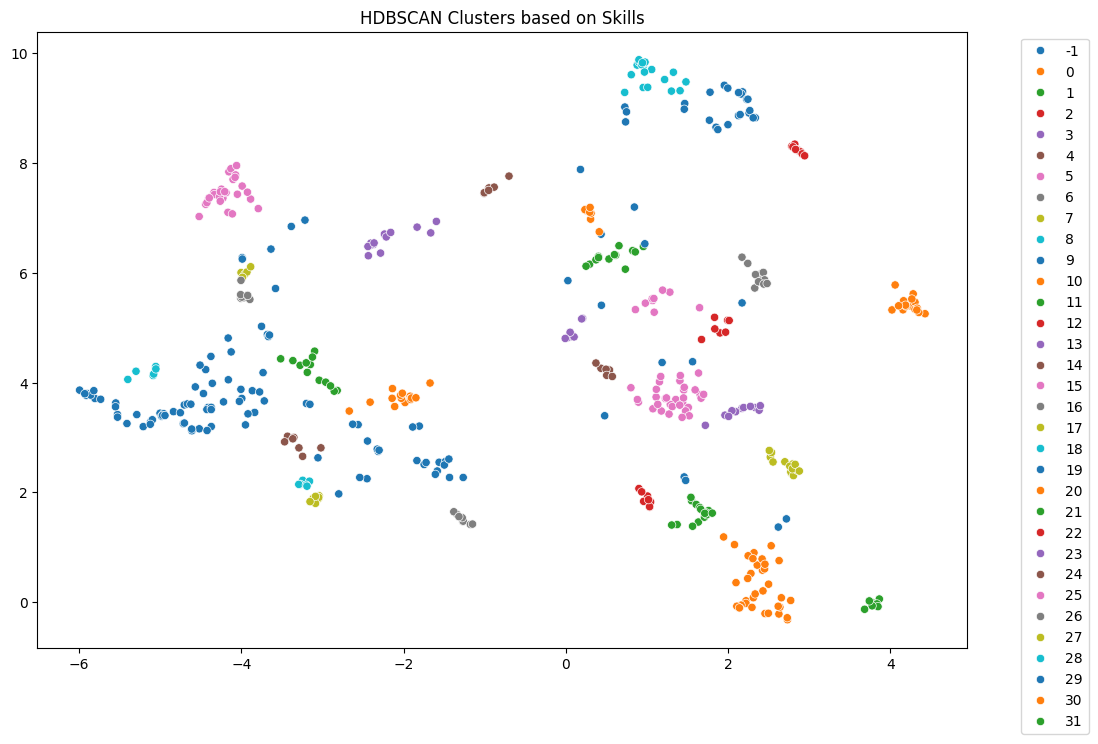

In [21]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=df['Skill_Cluster'], palette='tab10')
plt.title('HDBSCAN Clusters based on Skills')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
#2nd attempt code

In [22]:
for cluster_id in sorted(df['Skill_Cluster'].unique()):
    cluster_df = df[df['Skill_Cluster'] == cluster_id]
    print(f"\n🔹 Cluster {cluster_id} ({len(cluster_df)} items)")
    print(cluster_df['Cleaned_Job_Title'].value_counts().head(10))
    print("Top Skills:", cluster_df['Cleaned_Skills'].str.split(',').explode().value_counts().head(10).to_dict())
#2nd attempt code


🔹 Cluster -1 (49 items)
Cleaned_Job_Title
java developer                                        2
network engineer                                      2
nagios engineer                                       2
mulesoft developer                                    2
octopus deploy engineer                               2
computer network architect                            1
artificial intelligence  machine learning leader      1
artificial intelligence  machine learning srleader    1
micro services  api lead designer                     1
artifactory engineer                                  1
Name: count, dtype: int64
Top Skills: {' cloud computing': 7, ' devops practices': 7, ' java': 7, ' security': 5, 'automation': 5, ' scripting': 4, ' system administration': 4, ' system architecture': 4, ' monitoring': 4, ' deployment automation': 3}

🔹 Cluster 0 (18 items)
Cleaned_Job_Title
computer graphics animator    2
game developer                2
d artistanimator              2
unity de

In [23]:
from sklearn.metrics import silhouette_score

# Assuming 'X_umap' contains your UMAP embeddings and 'cluster_labels' your cluster labels
# Filter out noise points labeled as -1 (HDBSCAN labels noise as -1)
mask = cluster_labels != -1
filtered_embeddings = X_umap[mask]
filtered_labels = cluster_labels[mask]

# Compute the silhouette score
score = silhouette_score(filtered_embeddings, filtered_labels)
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.610


In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np

# Assuming 'X_umap' contains your UMAP embeddings and 'cluster_labels' your cluster labels
# Filter out noise points labeled as -1 (HDBSCAN labels noise as -1)
mask = cluster_labels != -1
filtered_embeddings = X_umap[mask]
filtered_labels = cluster_labels[mask]

# Check if there are at least 2 clusters after filtering
unique_clusters = np.unique(filtered_labels)
if len(unique_clusters) > 1:
    # Compute the silhouette score
    score = silhouette_score(filtered_embeddings, filtered_labels)
    print(f"Silhouette Score: {score:.3f}")
else:
    print(f"Cannot calculate silhouette score - only {len(unique_clusters)} cluster(s) after filtering")

Silhouette Score: 0.610


<ipython-input-24-7ad22f0864af>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')


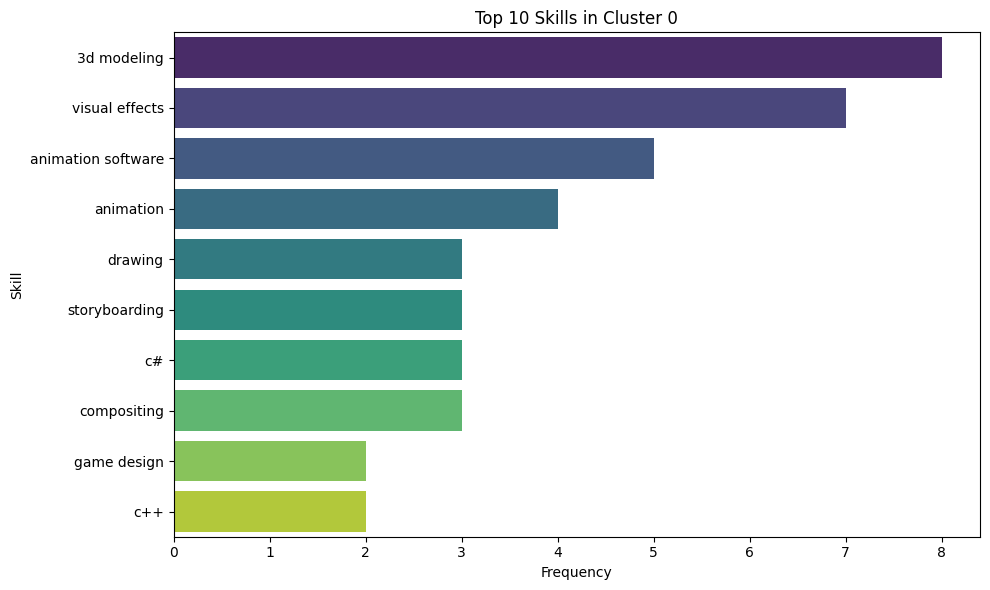

<ipython-input-24-7ad22f0864af>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')


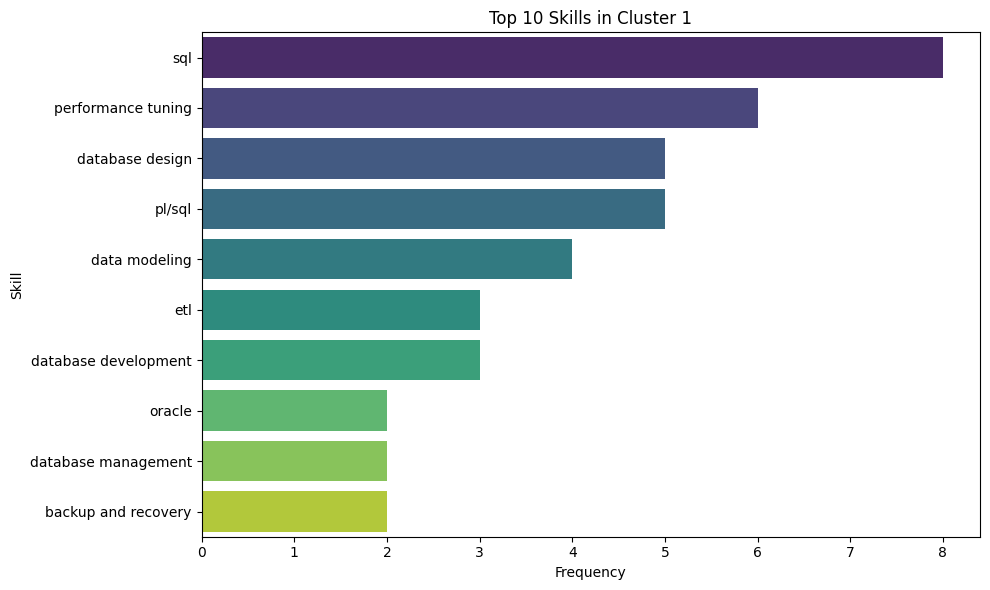

<ipython-input-24-7ad22f0864af>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')


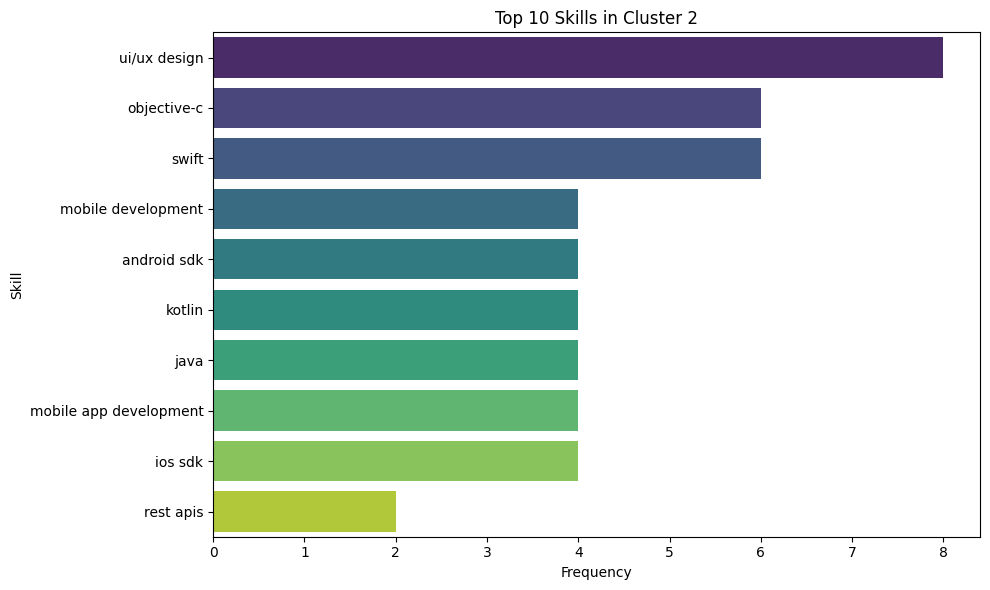

<ipython-input-24-7ad22f0864af>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')


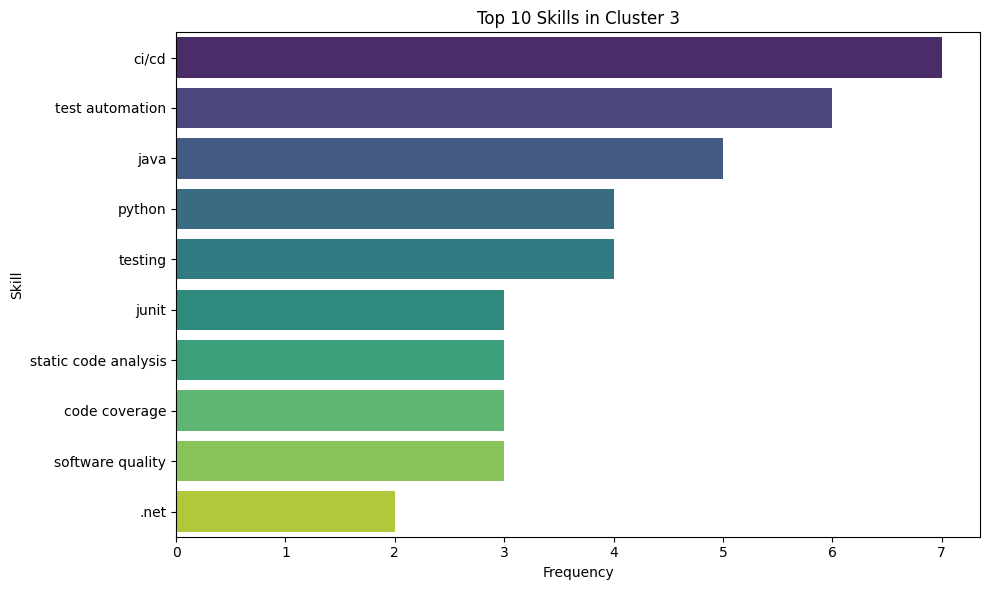

<ipython-input-24-7ad22f0864af>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')


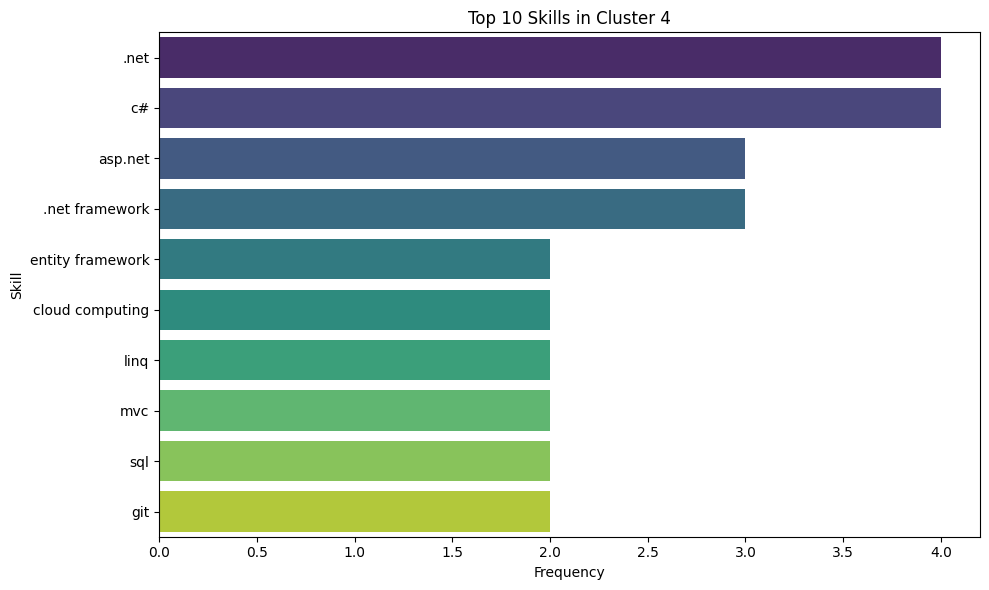

<ipython-input-24-7ad22f0864af>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')


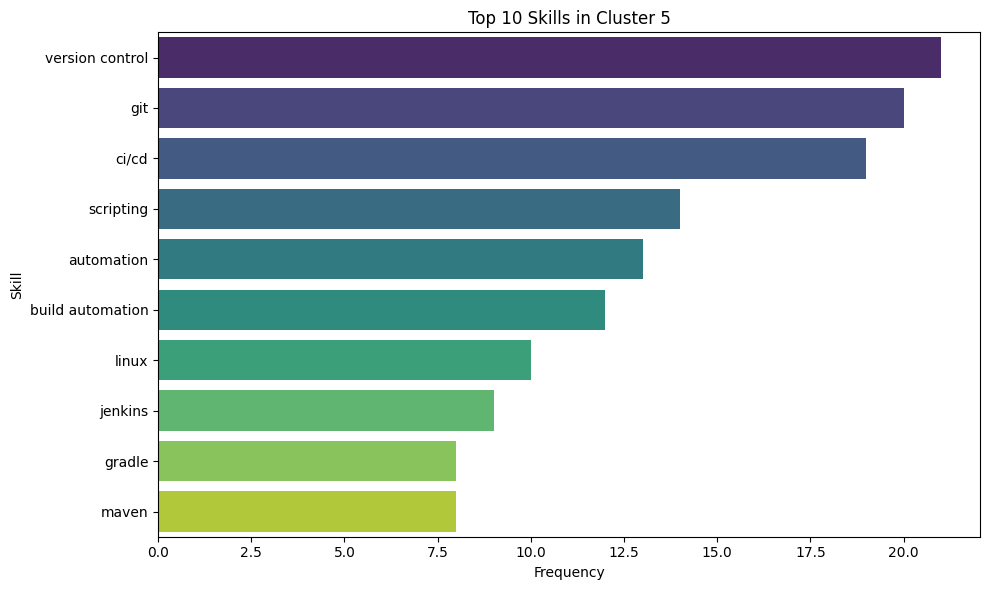

<ipython-input-24-7ad22f0864af>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')


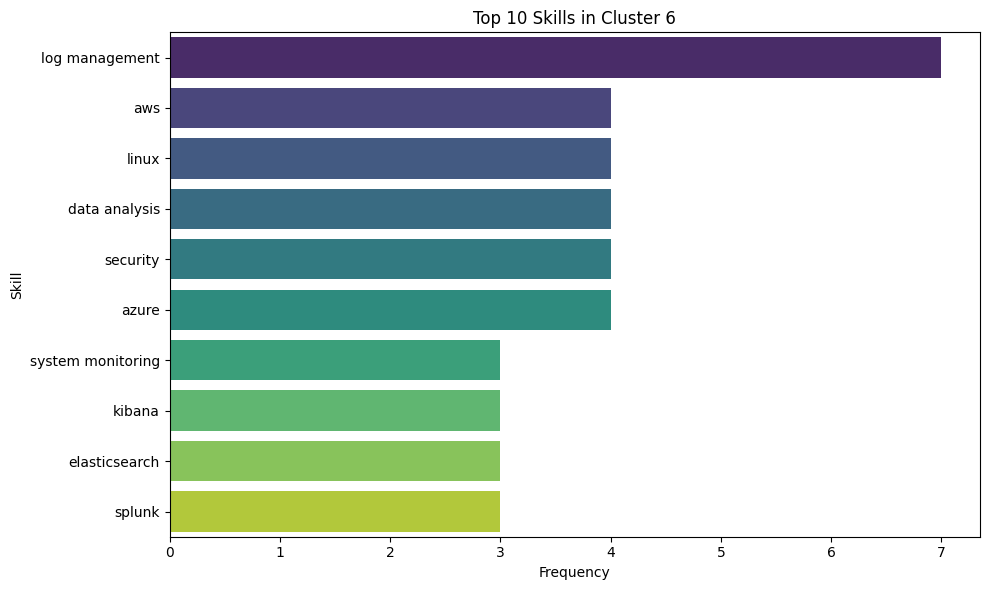

<ipython-input-24-7ad22f0864af>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')


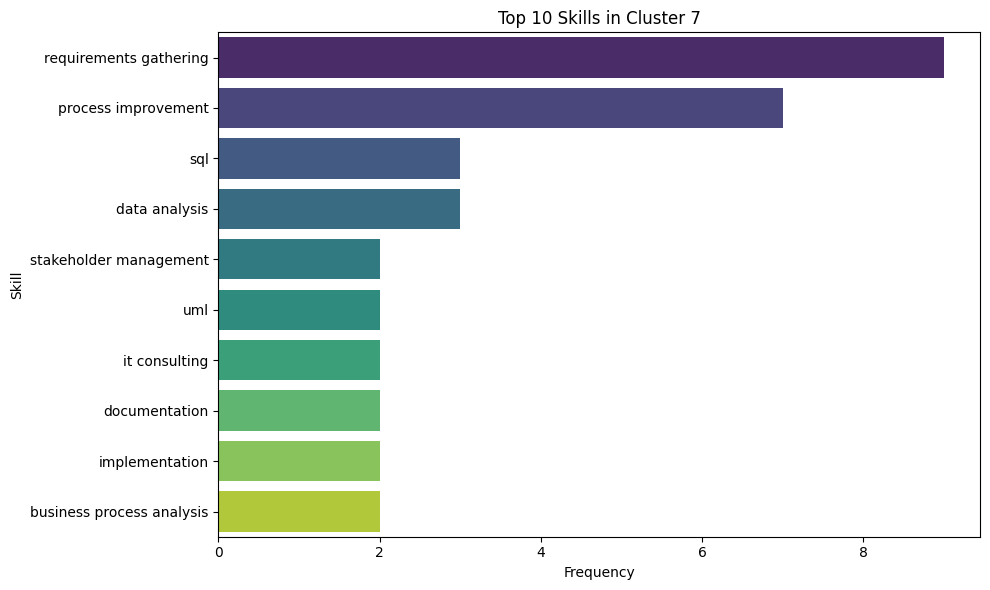

<ipython-input-24-7ad22f0864af>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')


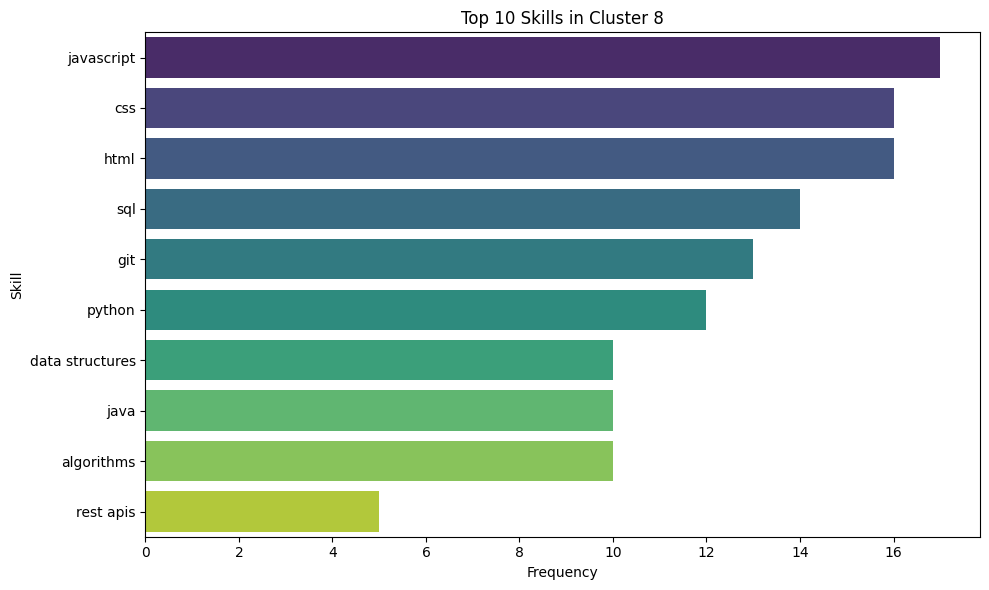

<ipython-input-24-7ad22f0864af>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')


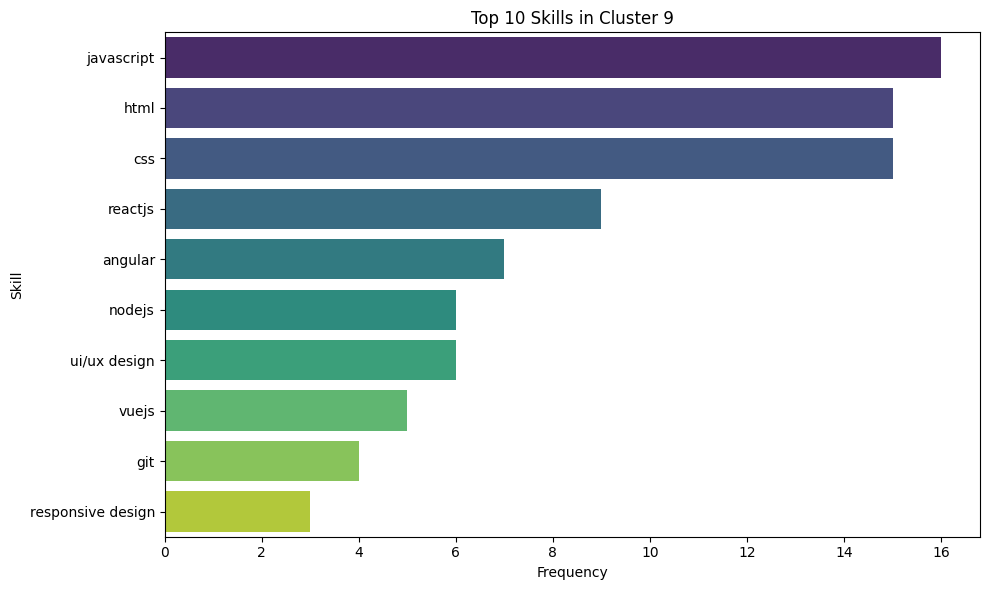

<ipython-input-24-7ad22f0864af>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')


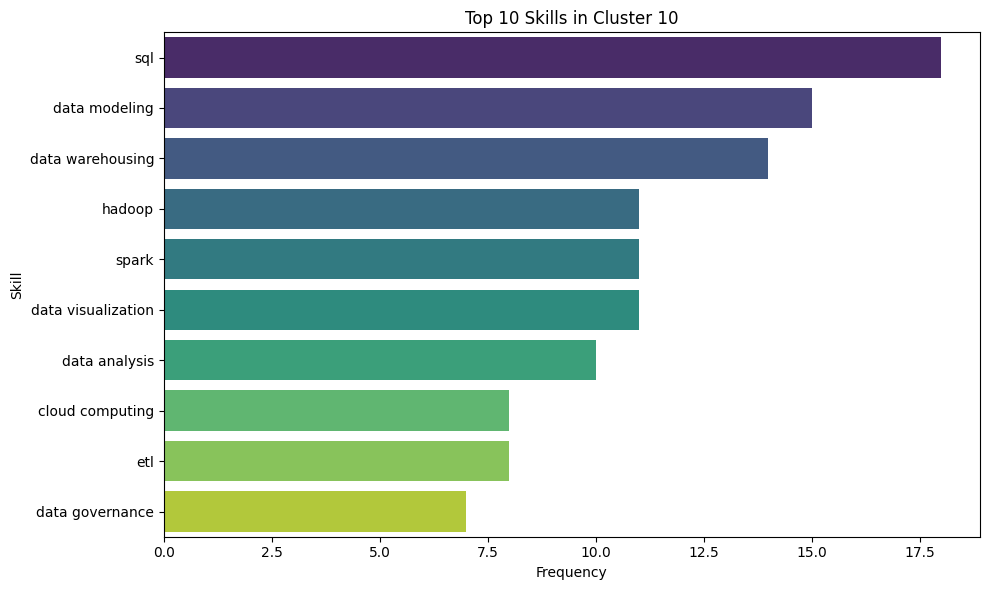

<ipython-input-24-7ad22f0864af>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')


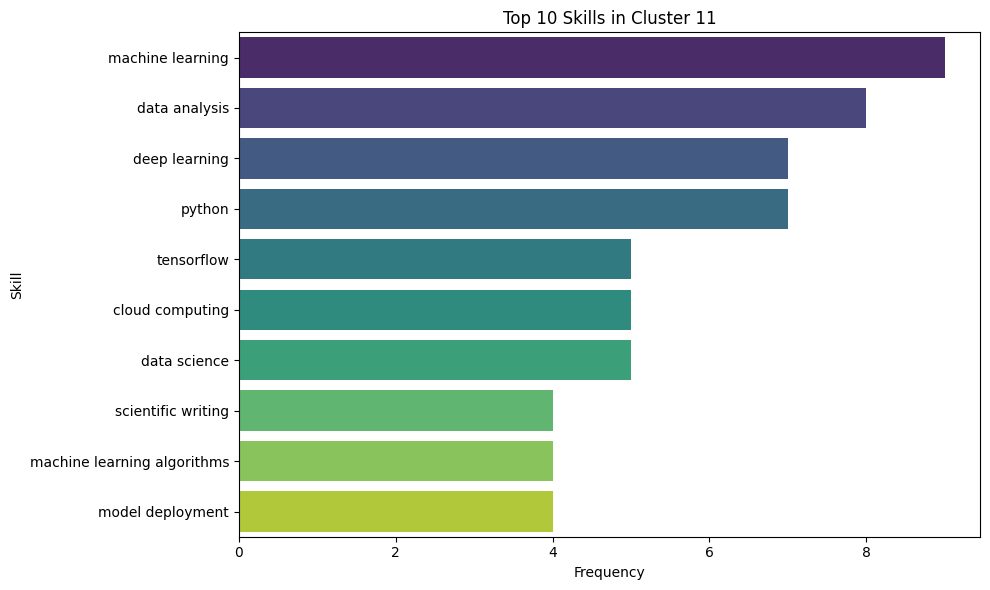

<ipython-input-24-7ad22f0864af>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')


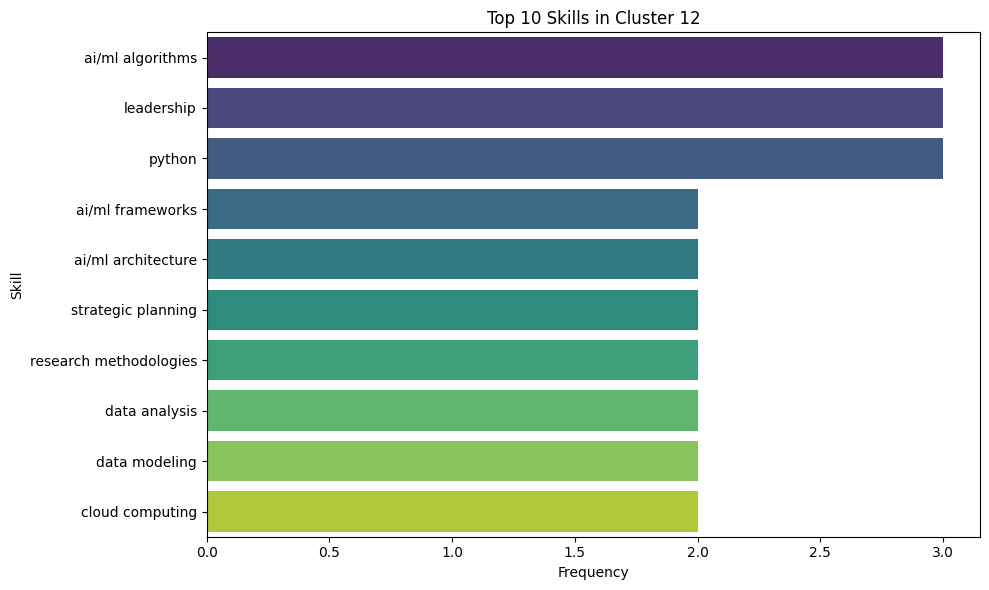

<ipython-input-24-7ad22f0864af>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')


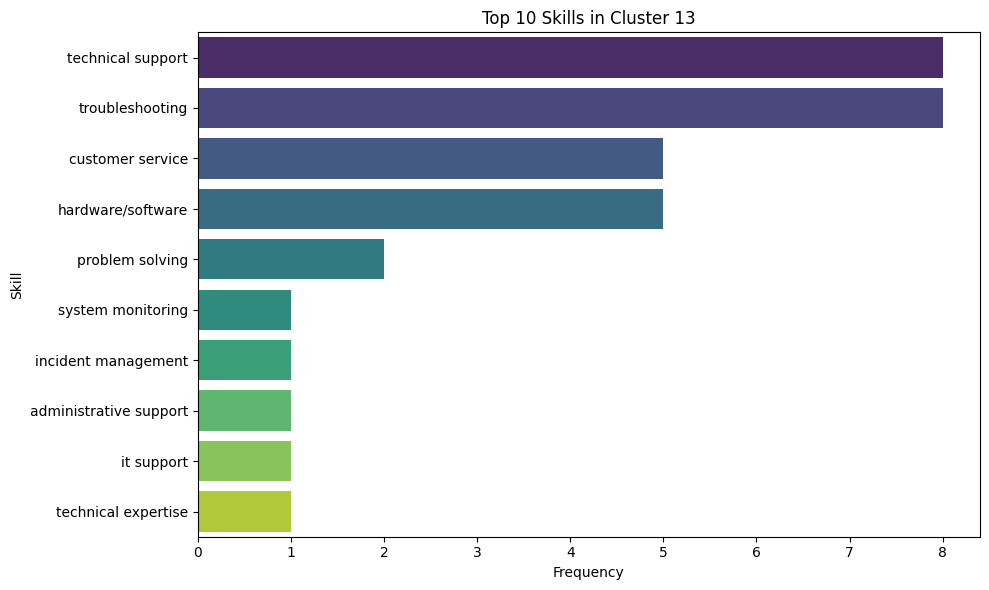

<ipython-input-24-7ad22f0864af>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')


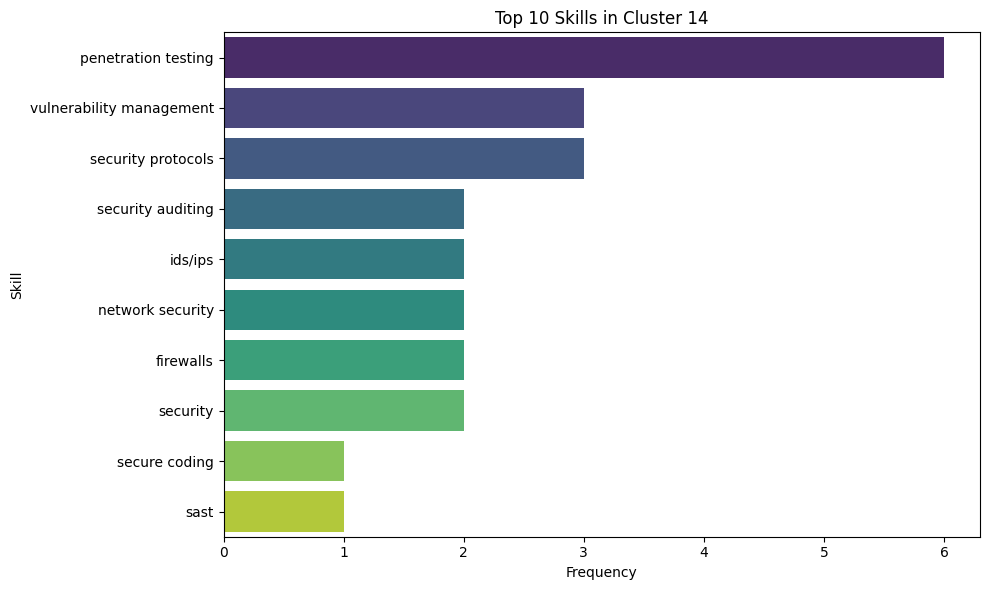

<ipython-input-24-7ad22f0864af>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')


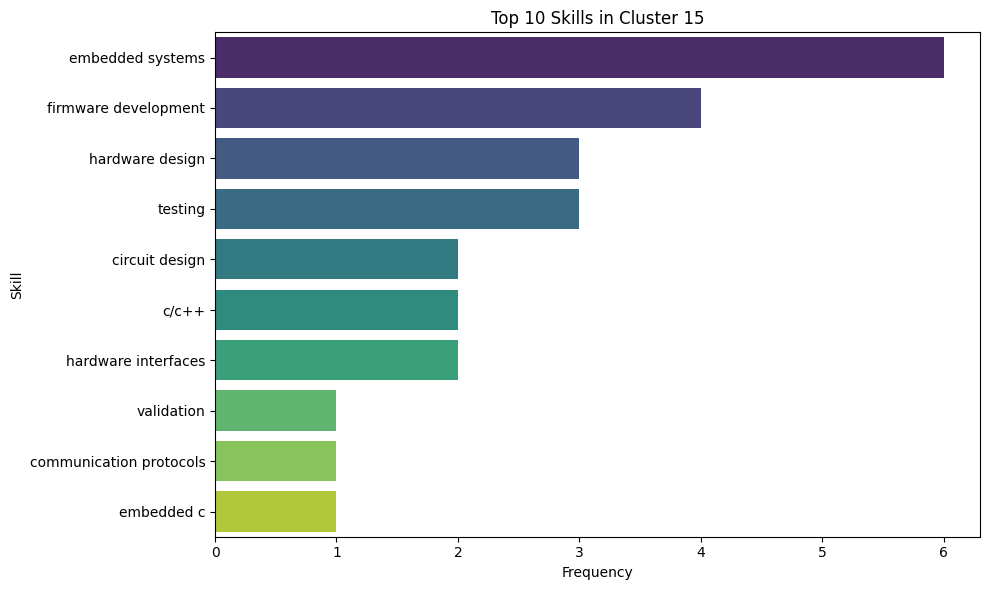

<ipython-input-24-7ad22f0864af>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')


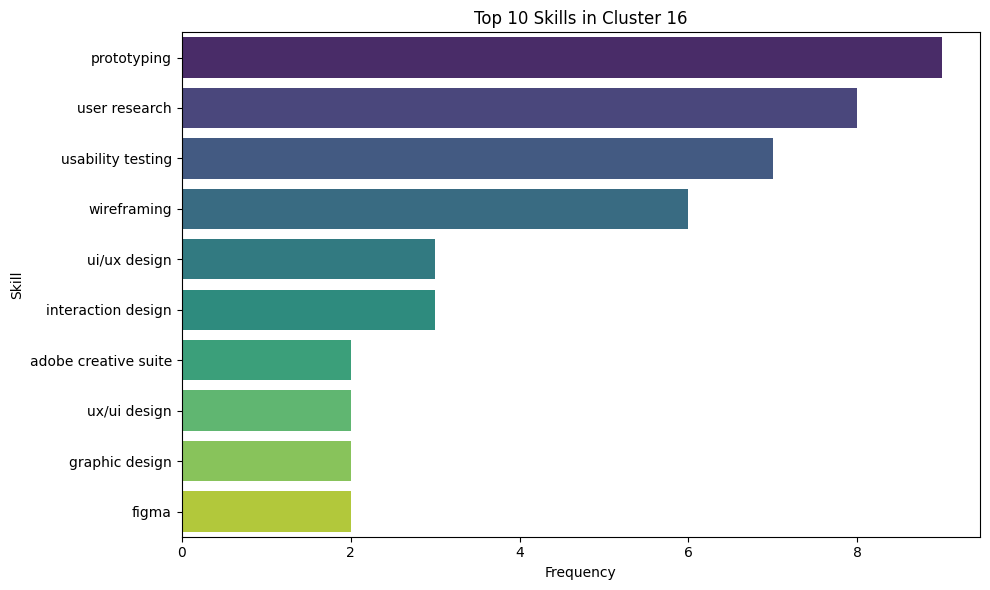

<ipython-input-24-7ad22f0864af>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')


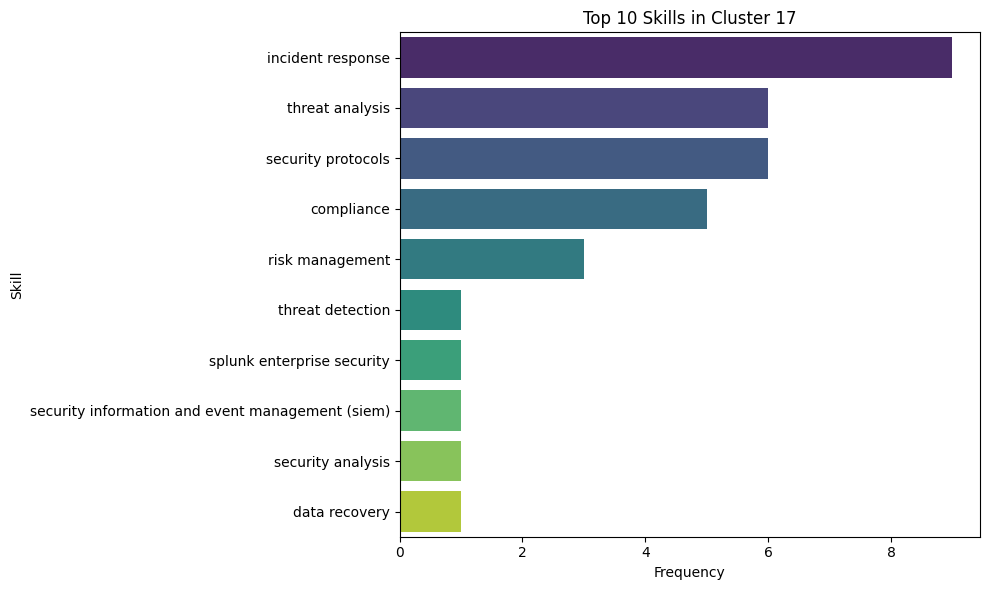

<ipython-input-24-7ad22f0864af>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')


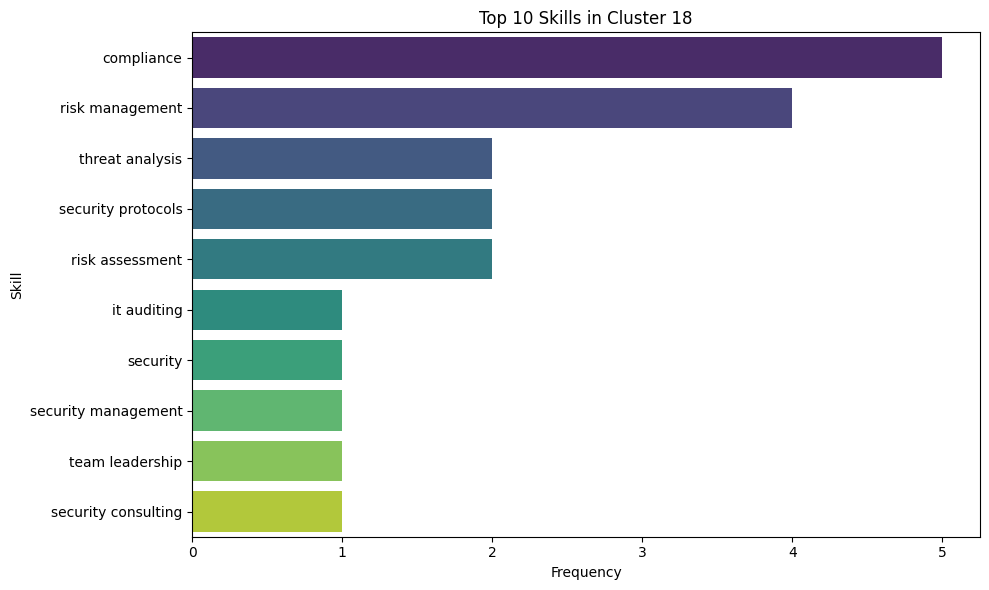

<ipython-input-24-7ad22f0864af>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')


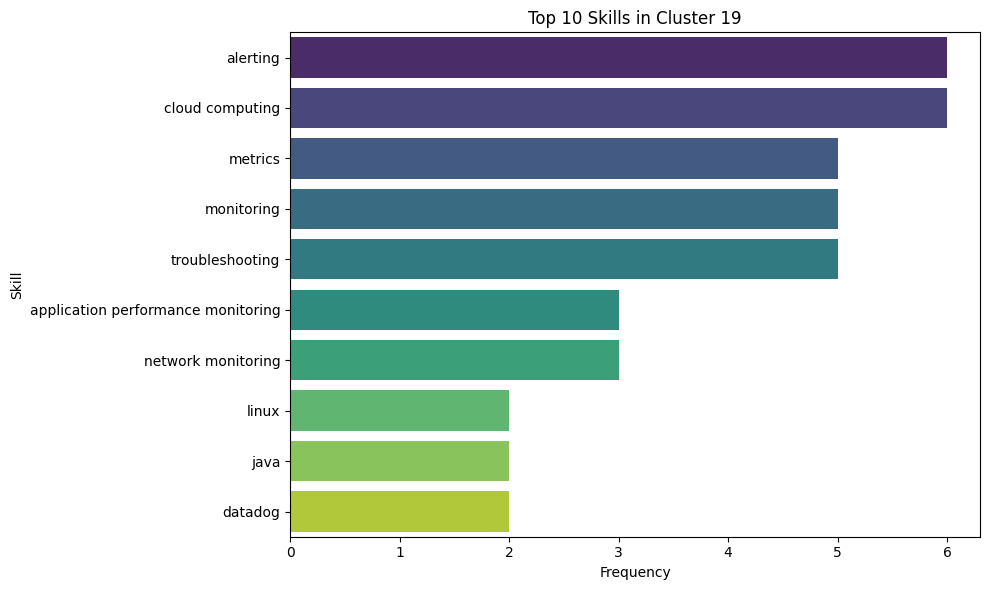

<ipython-input-24-7ad22f0864af>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')


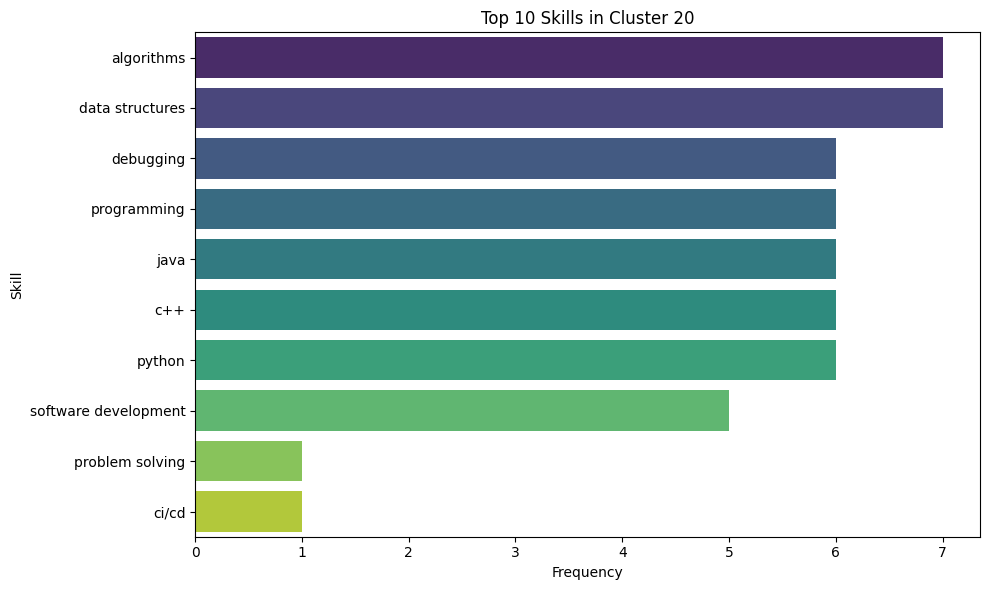

<ipython-input-24-7ad22f0864af>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')


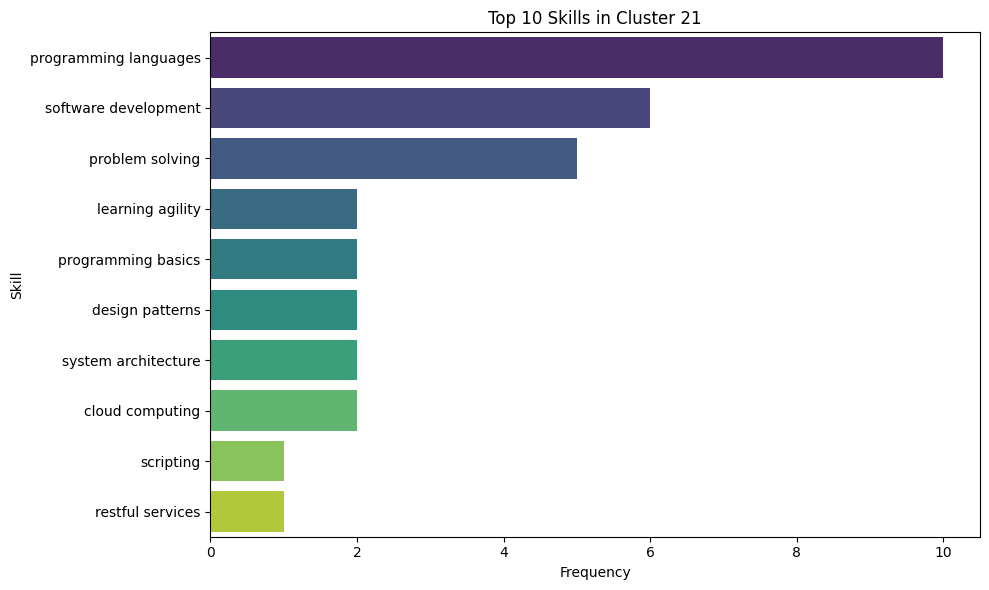

<ipython-input-24-7ad22f0864af>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')


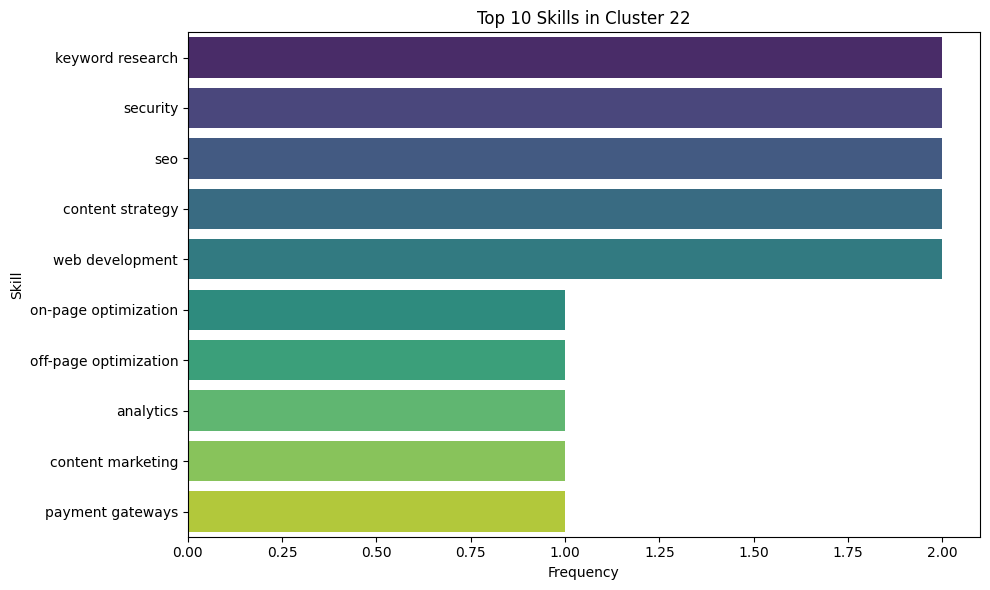

<ipython-input-24-7ad22f0864af>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')


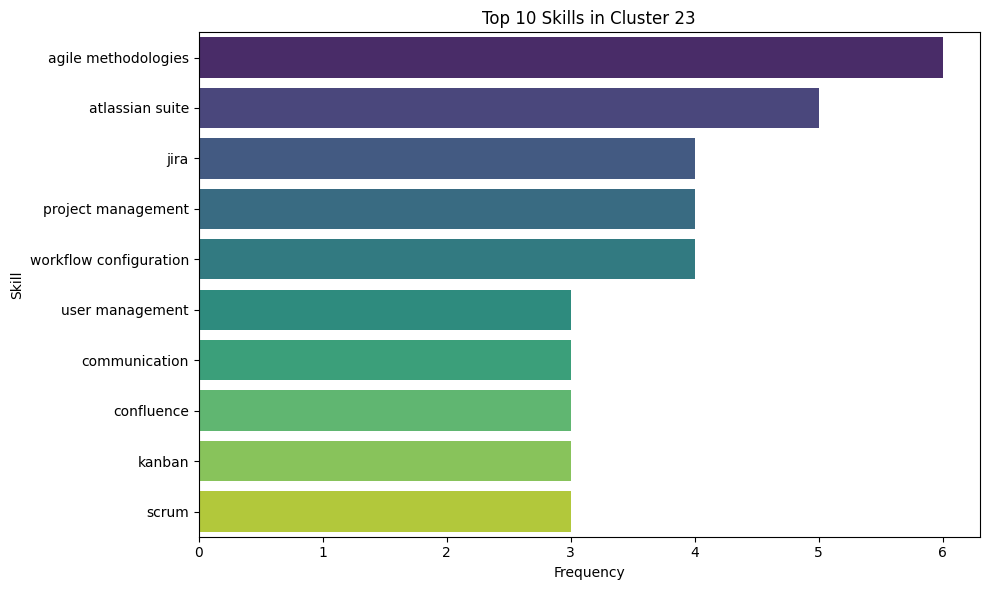

<ipython-input-24-7ad22f0864af>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')


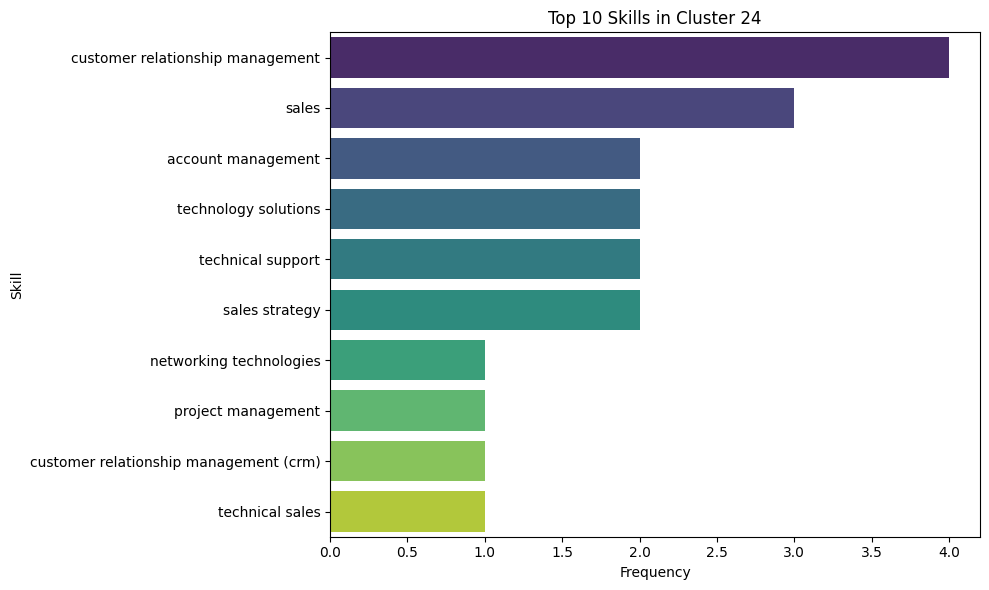

<ipython-input-24-7ad22f0864af>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')


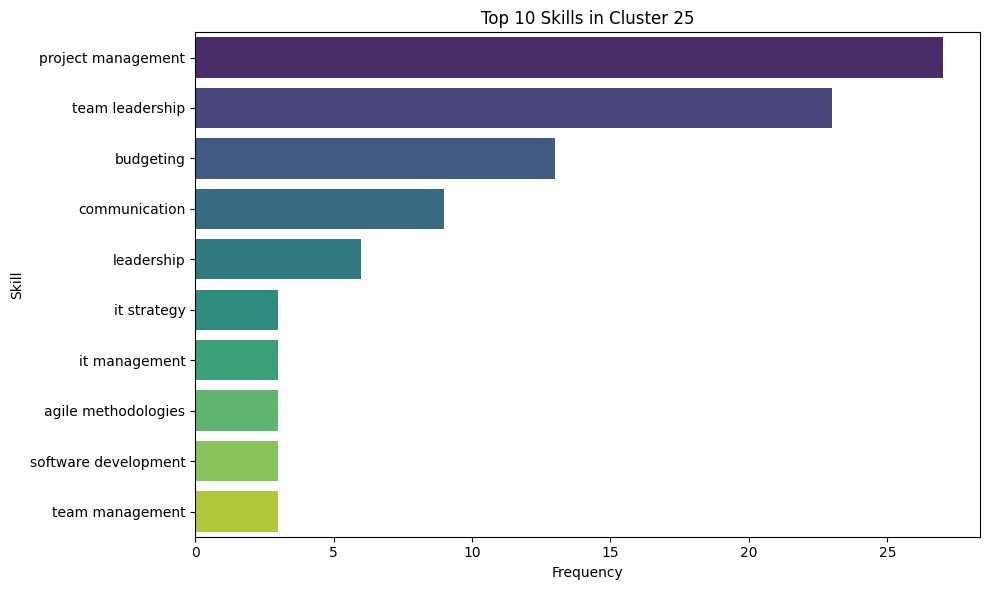

<ipython-input-24-7ad22f0864af>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')


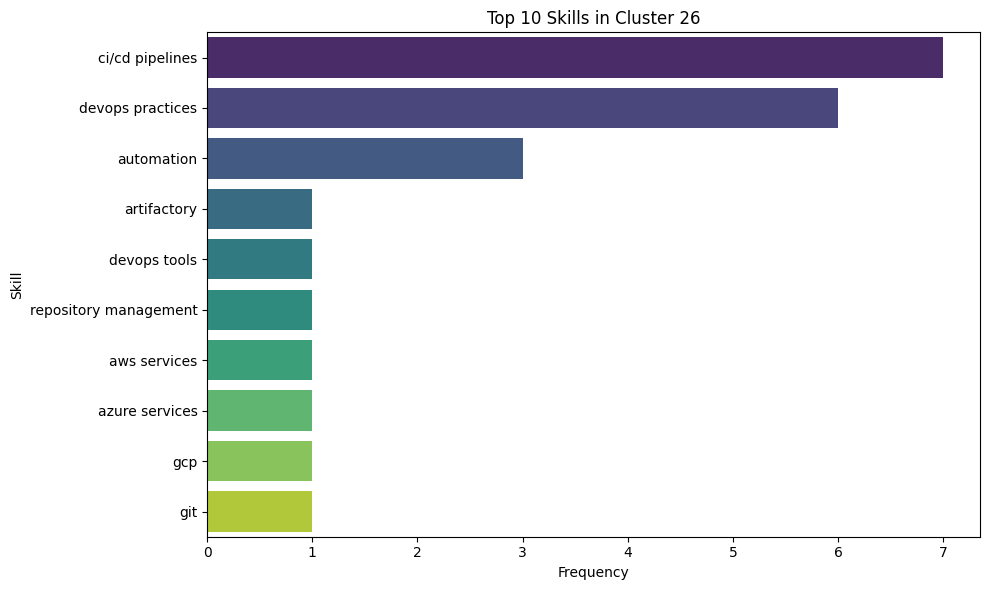

<ipython-input-24-7ad22f0864af>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')


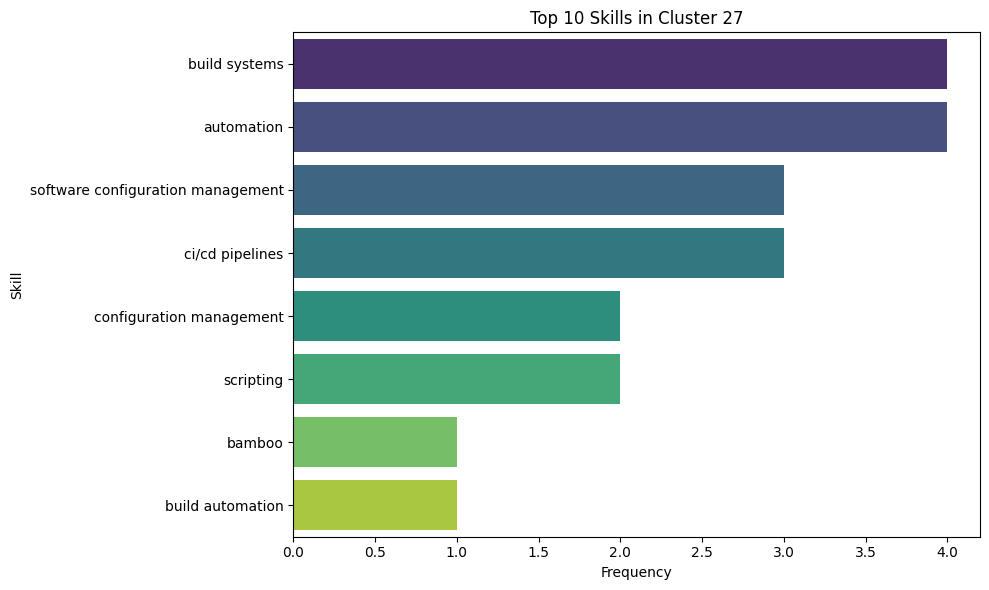

<ipython-input-24-7ad22f0864af>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')


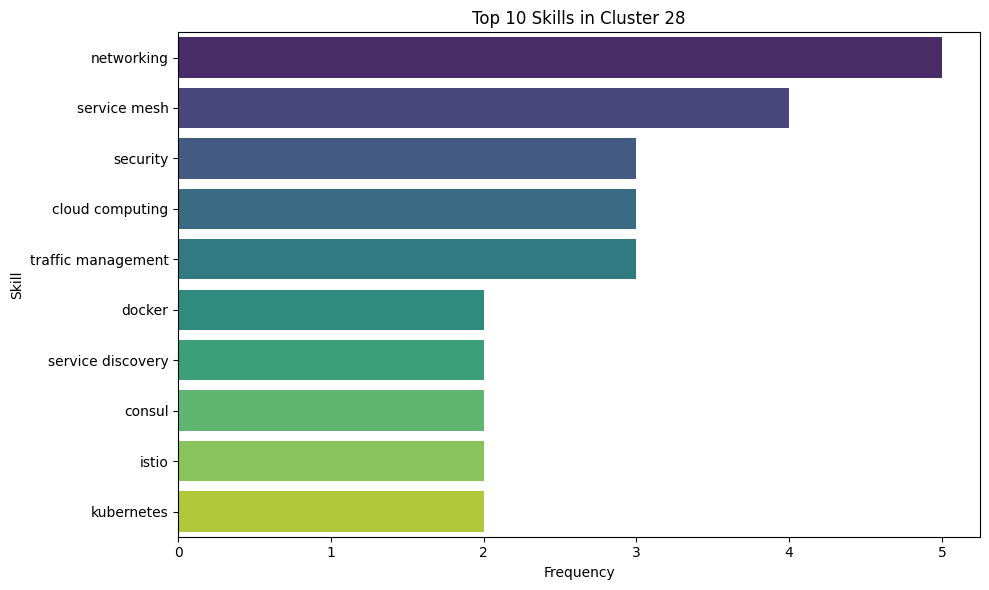

<ipython-input-24-7ad22f0864af>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')


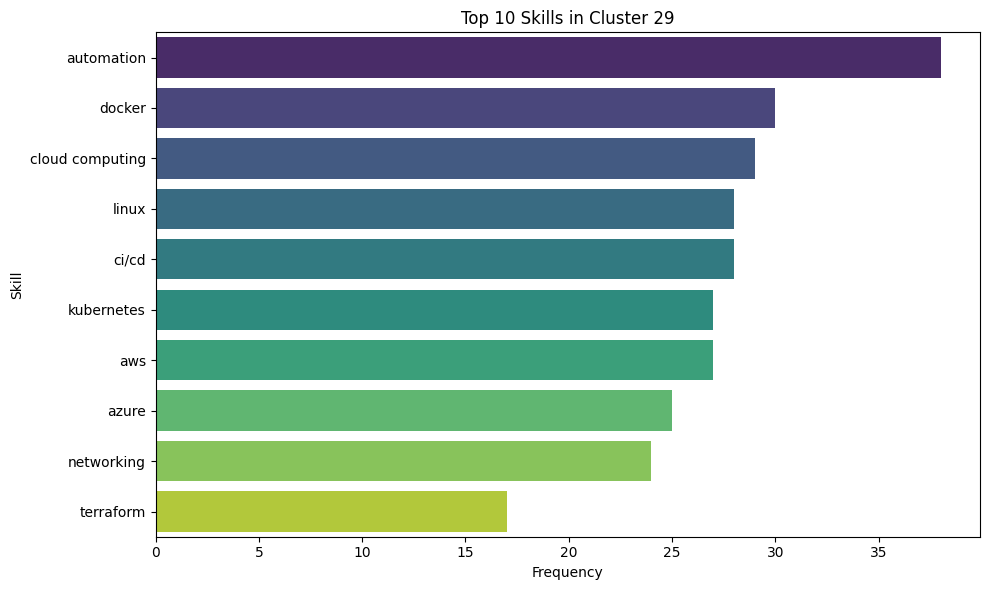

<ipython-input-24-7ad22f0864af>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')


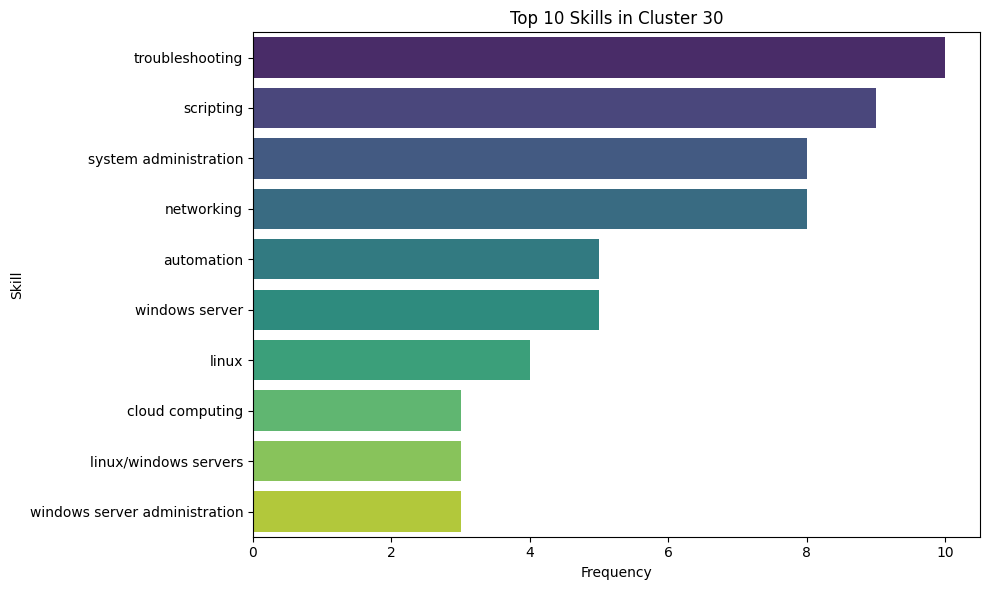

<ipython-input-24-7ad22f0864af>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')


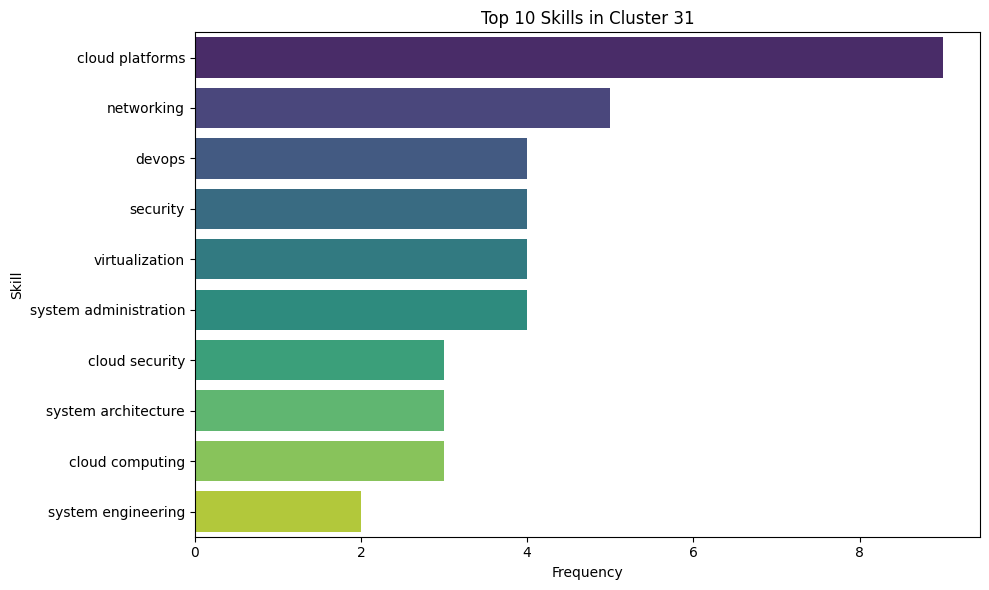

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Explode skills into separate rows
df_exploded = df.copy()
df_exploded['Skill_List'] = df_exploded['Cleaned_Skills'].str.split(',')
df_exploded = df_exploded.explode('Skill_List')

# Strip any extra whitespace
df_exploded['Skill_List'] = df_exploded['Skill_List'].str.strip()

# Loop through clusters
for cluster_id in sorted(df['Skill_Cluster'].unique()):
    if cluster_id == -1:
        continue  # Skip noise points if desired

    cluster_data = df_exploded[df_exploded['Skill_Cluster'] == cluster_id]

    # Get top skills in the cluster
    top_skills = cluster_data['Skill_List'].value_counts().head(10)

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')
    plt.title(f"Top 10 Skills in Cluster {cluster_id}")
    plt.xlabel("Frequency")
    plt.ylabel("Skill")
    plt.tight_layout()
    plt.show()


<ipython-input-28-c72725409719>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills_cluster1.values, y=top_skills_cluster1.index, palette='coolwarm')


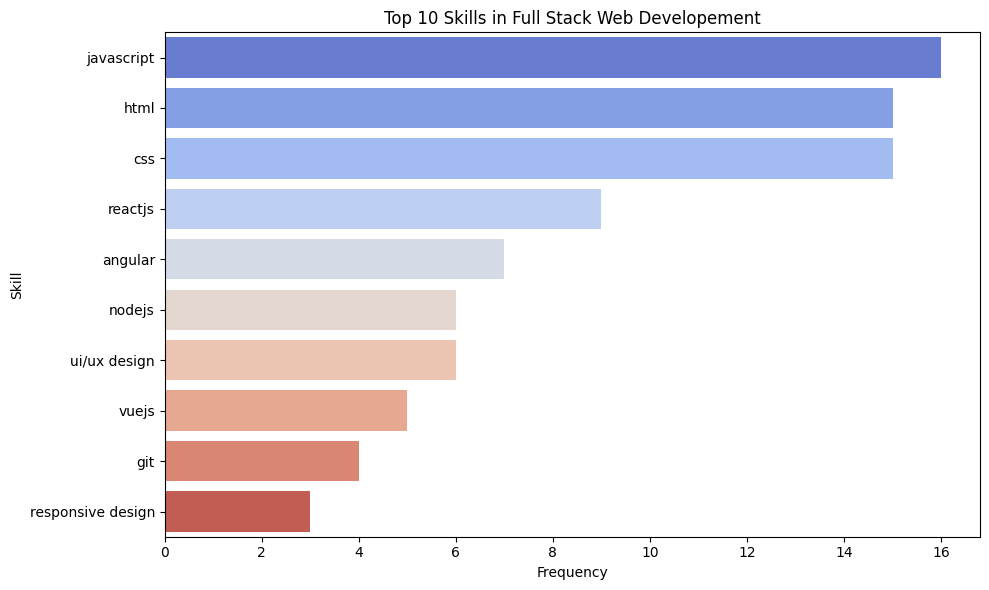

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Split skills into lists and explode into separate rows
df_cluster1 = df[df['Skill_Cluster'] == 9].copy()
df_cluster1['Skill_List'] = df_cluster1['Cleaned_Skills'].str.split(',')
df_cluster1 = df_cluster1.explode('Skill_List')

# Remove leading/trailing spaces from skill names
df_cluster1['Skill_List'] = df_cluster1['Skill_List'].str.strip()

# Count the top 10 skills in Cluster 1
top_skills_cluster1 = df_cluster1['Skill_List'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_skills_cluster1.values, y=top_skills_cluster1.index, palette='coolwarm')
plt.title("Top 10 Skills in Full Stack Web Developement")
plt.xlabel("Frequency")
plt.ylabel("Skill")
plt.tight_layout()
plt.show()


<ipython-input-25-af1f84f9d24e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=title_counts.values, y=title_counts.index, palette='viridis')


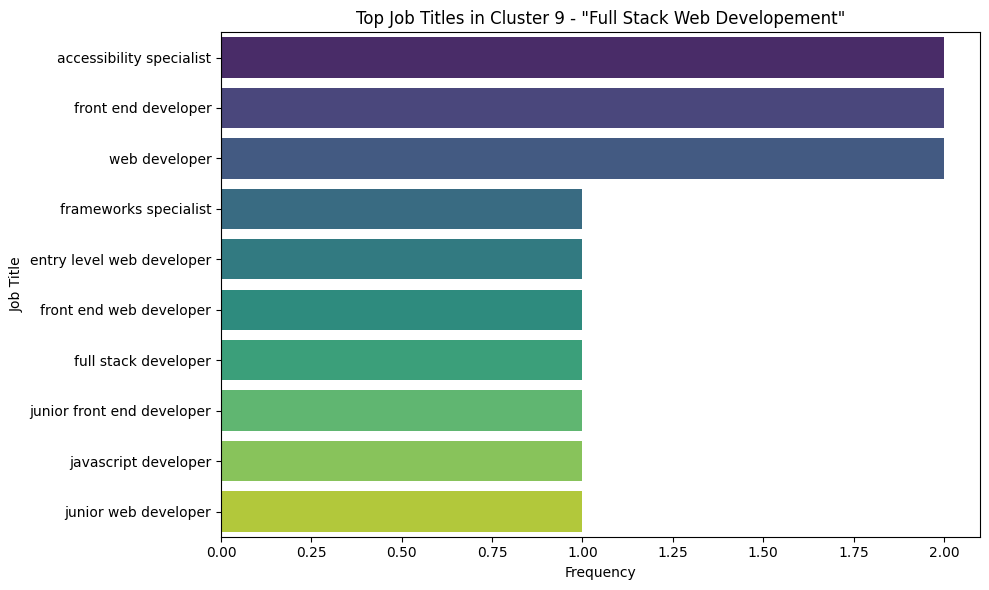

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for Cluster 1 (example)
cluster_id = 9
cluster_data = df[df['Skill_Cluster'] == cluster_id]

# Count the most frequent job titles
title_counts = cluster_data['Cleaned_Job_Title'].value_counts().head(10)  # top 10 titles

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=title_counts.values, y=title_counts.index, palette='viridis')
plt.title(f'Top Job Titles in Cluster {cluster_id} - "Full Stack Web Developement"')
plt.xlabel('Frequency')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()


In [26]:
outliers = df[df['cluster'] == -1]['clean_title'].value_counts()
print(outliers.head(20))



KeyError: 'cluster'

In [29]:
outliers = df[df['Skill_Cluster'] == -1]['Cleaned_Job_Title'].value_counts()
print(outliers.head(50))

Cleaned_Job_Title
java developer                                        2
network engineer                                      2
nagios engineer                                       2
mulesoft developer                                    2
octopus deploy engineer                               2
computer network architect                            1
artificial intelligence  machine learning leader      1
artificial intelligence  machine learning srleader    1
micro services  api lead designer                     1
artifactory engineer                                  1
blockchain developer                                  1
cloud automation engineer                             1
cloud security engineer                               1
computer programmer                                   1
devops architect                                      1
docker engineer                                       1
entry level network engineer                          1
entry level web developer     